In [1]:
# Function to automatically gate channels plot for a threshold given each ch in channel array

# From ckine.flow import --> change flow.py? restart kernel

# Make functions, commit to git--> commit on separate branch

# Function where given full experiment --> T reg and Nk folder, given march 15 experiment --> import 96x2 files

In [2]:
# Import FCS files. Variable input: name of path name to file. 
def importF(pathname):
    # Declare arrays and int
    file = []
    sample = []
    z = 0
    # Read in user input for file path and assign to array file 
    pathlist = Path(r'' + str(pathname)).glob('**/*.fcs')
    for path in pathlist:
        path_in_str = str(path)
        file.append(path_in_str)
    # Go through each file and assign the file contents to entry in the array sample
    for entry in file:
        sample.append(FCMeasurement(ID = 'Test Sample' + str(z), datafile = entry))
        z+=1
    importF.sample = sample
    # Returns the array sample which contains data of each file in folder (one file per entry in array)
    return sample


In [3]:
#Treg and NonTreg
#Function for sorting T cells. Need to input samples which is returned value of importF function
def tcells(sample):
    # Declare arrays to store gated T reg and non T reg data
    tregdata = []
    nonTregdata = []
    # Declare arrays to determine number of cells in data set
    treg_count = []
    nonTreg_count = []
    
    # T reg: Take quad gates for T reg cells and combine them to create single, overall T reg gate
    treg1 = QuadGate((7.063e+03, 3.937e+03), ('BL1-H', 'VL1-H'), region='top left', name='treg1')
    treg2 = QuadGate((5.412e+03, 6.382e+03), ('BL1-H', 'VL1-H'), region='bottom right', name='treg2')
    treg_gate = treg1 & treg2

    # non T reg: Take quad gates for non T reg cells and combine to create overall non T reg gate
    nonTreg1 = QuadGate((5.233e+03, 1.731e+03), ('BL1-H', 'VL1-H'), region='top left', name='nonTreg1')
    nonTreg2 = QuadGate((2.668e+03, 5.692e+03), ('BL1-H', 'VL1-H'), region='bottom right', name='nonTreg2')
    nonTreg_gate = nonTreg1 & nonTreg2

    # Go through each file/entry in the array sample
    for i, item0 in enumerate(sample):
        # Assign data of current file for analysis to variable smpl
        smpl = sample[i]
        # Create int variable to use for matplotlib subplot which begins counting at 1 (not 0!)
        num = i + 1
        
        # CD25 v. Foxp33: VL1 v. BL1
        
        # Treg
        # Apply T reg gate to overall data --> step that determines which cells are Treg
        treg = smpl.gate(treg_gate)
        # Add data of gated T reg cells to array --> this is the data for T reg cells
        tregdata.append(treg.get_data())
        # Number of events (AKA number of cells)
        treg_count.append(treg.get_data().shape[0])
        
        # Create plot for T reg
        # --> 
        # Use matplotlib to create plots of T reg cells in each file in folder
        plt.figure(0)
        plt.subplot(3,2,num)
        plt.subplots_adjust(wspace = 1)
        plt.subplots_adjust(hspace = 1)
        # This is the plot function included in the FlowCytometryTools package --> only use those proteins becuase that is defined as T reg
        treg.plot(['BL1-H','VL1-H'])
        # <--
        # Code between arrows can be commented out if don't want graph 
        
        
        # Non Tregs
        # Apply non T reg gate to overall data --> step that detrmines which cells are non T reg
        nonTreg = smpl.gate(nonTreg_gate)
        # Add data of gated non T reg cells to array
        nonTregdata.append(nonTreg)
        # Number of events (number of cells)
        nonTreg_count.append(nonTreg.get_data().shape[0])
        
        # Create plot for non T reg
        # -->
        plt.figure(1)
        plt.subplot(3,2,num)
        plt.subplots_adjust(wspace = 1)
        plt.subplots_adjust(hspace = 1)
        nonTreg.plot(['BL1-H','VL1-H'])
        # <--
    # Show figures
    print('Number of Treg cells:' + str(treg_count))
    print('Number of Non Treg cells:' + str(nonTreg_count))
    plt.show

In [4]:
#NK Cells
#Function for sorting NK cells. Input is samples which is returned value of importF function
def nkcells(sample):
    # Create arrays to store gated data of each cell type
    nkdata = []
    bnkdata = []
    cddata = []
    # Declare arrays to determine number of cells in data set
    nk_count = []
    bnk_count = []
    cd_count = []
    
    # NK cells: Take quad gates for NK cells and combine them to create single, overall NK gate
    nk1 = QuadGate((6.468e+03, 4.861e+03), ('BL1-H', 'VL4-H'), region='top left', name='nk1')
    nk2 = QuadGate((5.550e+03, 5.813e+03), ('BL1-H', 'VL4-H'), region='bottom right', name='nk2')
    nk_gate = nk1 & nk2

    # Bright NK cells: Take quad gates for bright NK cells and combine them to create single, overall bright NK gate
    bnk1 = QuadGate((7.342e+03, 4.899e+03), ('BL1-H', 'VL4-H'), region='top left', name='bnk1')
    bnk2 = QuadGate((6.533e+03, 5.751e+03), ('BL1-H', 'VL4-H'), region='bottom right', name='bnk2')
    bnk_gate = bnk1 & bnk2
    
    # CD cells: Take quad gates for CD cells and combine them to create single, overall CD gate
    cd1 = QuadGate((9.016e+03, 5.976e+03), ('RL1-H', 'VL4-H'), region='top left', name='cd1')
    cd2 = QuadGate((6.825e+03, 7.541e+03), ('RL1-H', 'VL4-H'), region='bottom right', name='cd2')
    cd_gate = cd1 & cd2
    
    # Go through each file/entry in the array sample
    for i, item0 in enumerate(sample):
        # Assign data of current file for analysis to variable smpl
        smpl = sample[i]
       
        # Create int variable to use for matplotlib subplot which begins counting at 1 (not 0!)
        num = i + 1
        
        # CD3 v. CD56: VL4 v. BL1
        
        # NK
        # Apply NK gate to overall data --> step that determines which cells are NK
        nk = smpl.gate(nk_gate)
        # Add data of gated NK cells to array --> this is the data for NK cells
        nkdata.append(nk.get_data())
        # Number of events
        nk_count.append(nk.get_data().shape[0])
        
        # Create plot for NK
        # -->
        plt.figure(2)
        plt.subplot(3,2,num)
        plt.subplots_adjust(wspace = 1)
        plt.subplots_adjust(hspace = 1)
        nk.plot(['BL1-H','VL4-H'])
        # <--
        
        # CD56 Bright NK
        # Apply Bright NK gate to overall data --> step that determines which cells are Bright NK
        bnk = smpl.gate(bnk_gate)
        # Add data of gated bright NK cells to array
        bnkdata.append(bnk.get_data())
        
        bnk_count.append(bnk.get_data().shape[0])
        
        # Create plot for Bright NK
        # -->
        plt.figure(3)
        plt.subplot(3,2,num)
        plt.subplots_adjust(wspace = 1)
        plt.subplots_adjust(hspace = 1)
        bnk.plot(['BL1-H','VL4-H'])
        # <--
        
        #CD3 v. CD8: VL4 v. RL1
        #CD3+CD8+
        # Apply CD cell gate to overall data --> step that determines which cells are CD
        cd = smpl.gate(cd_gate)
        cddata.append(cd.get_data())
        # Number of events
        cd_count.append(cd.get_data().shape[0])
        
        # Create plot for CD
        # -->
        plt.figure(4)
        plt.subplot(3,2,num)
        plt.subplots_adjust(wspace = 1)
        plt.subplots_adjust(hspace = 1)
        cd.plot(['RL1-H','VL4-H'])
        # <--
    print('Number of NK cells:' + str(nk_count)) 
    print('Number of Bright NK cells:' + str(bnk_count))
    print('Number of CD cells:' + str(cd_count))
    plt.show()


/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


What is the name of the NK plate folder?: NKplate
What is the name of the T plate folder?: Tplate


Number of NK cells:[7, 20, 5, 12, 12, 19]
Number of Bright NK cells:[2, 6, 5, 1, 8, 10]
Number of CD cells:[0, 147, 1, 183, 4, 82]


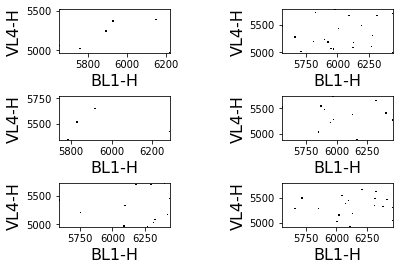

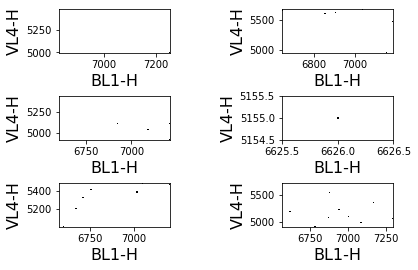

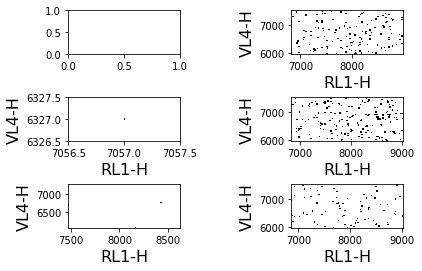

Number of Treg cells:[1, 860, 8, 589, 7, 929]
Number of Non Treg cells:[42, 10284, 41, 1880, 58, 2703]


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


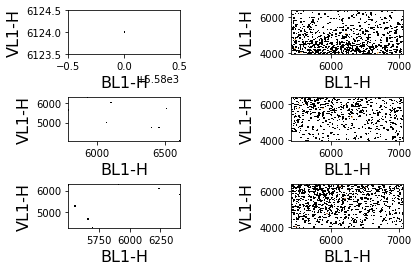

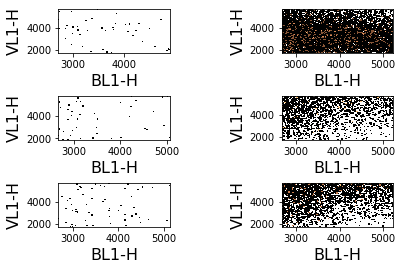

In [5]:
# Import all necessary packages to run functions
import matplotlib
import numpy as np
import pandas
import scipy
import FlowCytometryTools
import pylab
import sys
import pathlib
from matplotlib import pyplot as plt
from pathlib import Path
from FlowCytometryTools import test_data_dir, test_data_file
from FlowCytometryTools import FCMeasurement
from matplotlib.backends.backend_pdf import PdfPages
from FlowCytometryTools import ThresholdGate, PolyGate, QuadGate
%matplotlib inline

# Ask user for names of NK plate and T plate folders
nk_plate = input('What is the name of the NK plate folder?:')
tplate = input('What is the name of the T plate folder?:')

# Import NK plate folder and T plate folder. NOTE: must be in folder form for program to work, cannot just import single .fcs file
nkFile = importF(nk_plate)
tFile = importF(tplate)

# Apply gating to NK and T plate files
nkcells(nkFile)
tcells(tFile)